In [49]:
import pandas as pd 
import matplotlib.pyplot as plt 


In [50]:
# load data
# print value of data
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

print(data)

      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

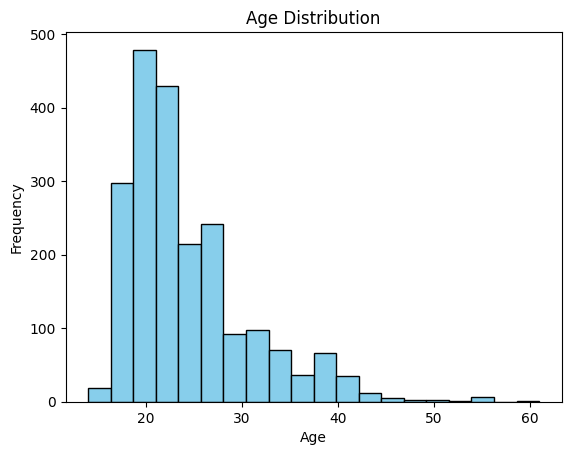

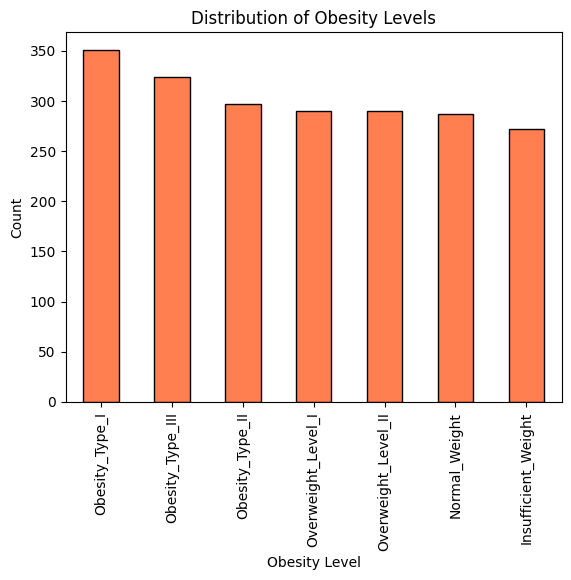

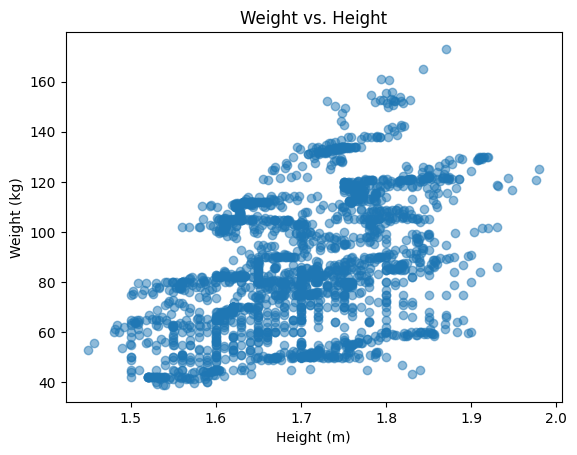

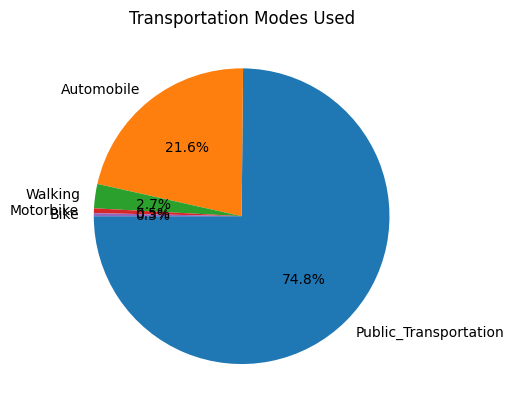

In [51]:
import matplotlib.pyplot as plt

# Setting up the matplotlib figure

# Histogram for Age distribution
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar chart for NObeyesdad categories
data['NObeyesdad'].value_counts().plot(kind='bar', color='coral', edgecolor='black')
plt.title('Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.show() 

# Scatter plot of Weight vs. Height
plt.scatter(data['Height'], data['Weight'], alpha=0.5)
plt.title('Weight vs. Height')
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.show() 

# Pie chart for Transportation Modes
data['MTRANS'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=180)
plt.title('Transportation Modes Used')
plt.ylabel('')  # Hide the y-label

# Adjust layout
# plt.tight_layout()
plt.show()


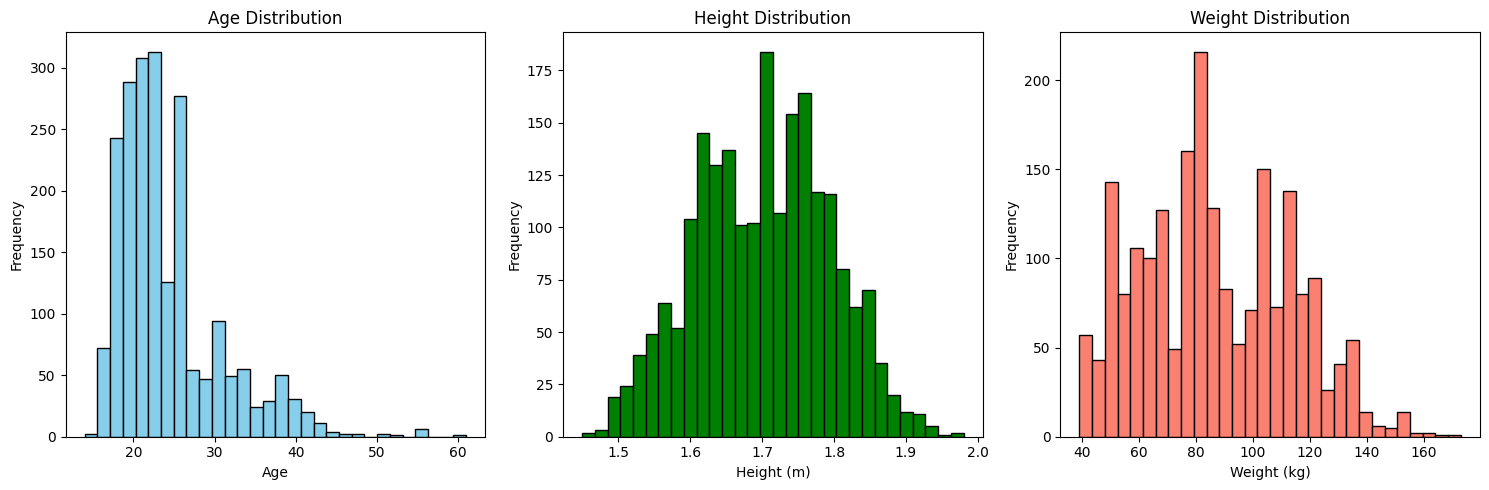

In [52]:
# Setting up the matplotlib figure
plt.figure(figsize=(15, 5))

# Histogram for Age
plt.subplot(1, 3, 1)
plt.hist(data['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for Height
plt.subplot(1, 3, 2)
plt.hist(data['Height'], bins=30, color='green', edgecolor='black')
plt.title('Height Distribution')
plt.xlabel('Height (m)')
plt.ylabel('Frequency')

# Histogram for Weight
plt.subplot(1, 3, 3)
plt.hist(data['Weight'], bins=30, color='salmon', edgecolor='black')
plt.title('Weight Distribution')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


In [53]:
# Define age groups
bins = [0, 18, 35, 55, 100]
labels = ['0-18', '19-35', '36-55', '56+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Grouping by Age Group and NObeyesdad to see the count in each category
age_group_obesity = data.groupby(['Age Group', 'NObeyesdad']).size().reset_index(name='Count')

# Creating a pivot table for easier visualization
pivot_table = age_group_obesity.pivot(index='Age Group', columns='NObeyesdad', values='Count').fillna(0)

pivot_table


C:\Users\DELL\AppData\Local\Temp\ipykernel_17316\1197966373.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_obesity = data.groupby(['Age Group', 'NObeyesdad']).size().reset_index(name='Count')


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Age Group,,,,,,,
0-18,49,25,8,0,0,20,11
19-35,222,254,272,268,324,248,239
36-55,1,7,71,29,0,21,35
56+,0,1,0,0,0,1,5


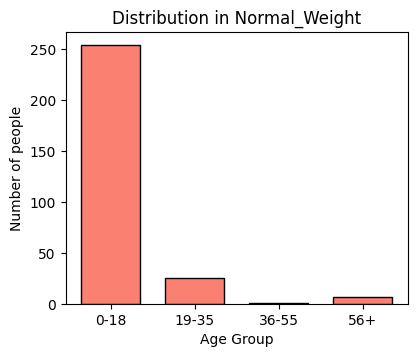

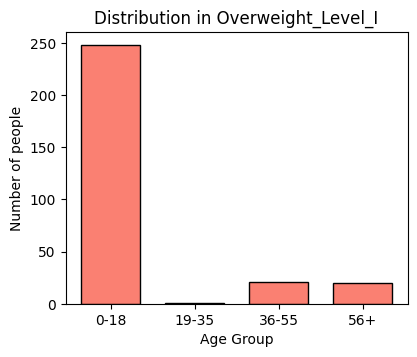

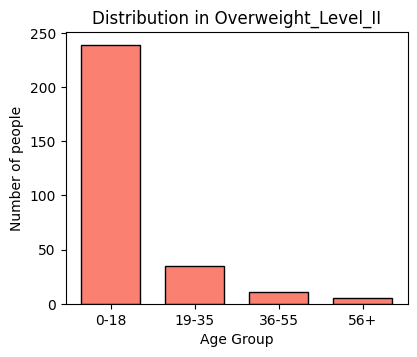

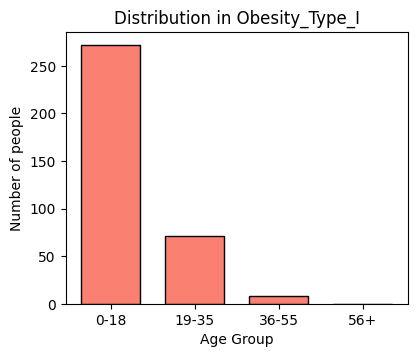

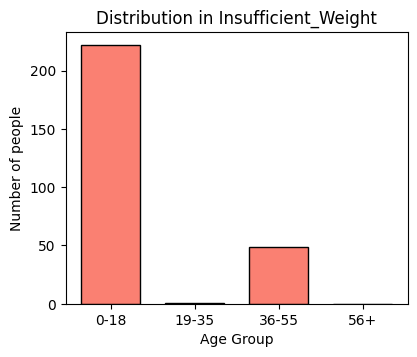

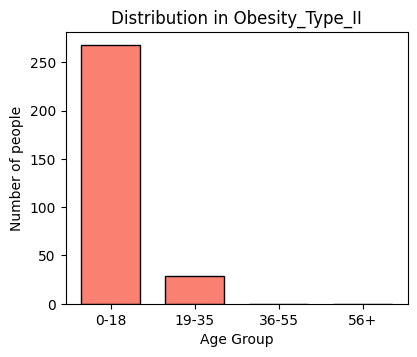

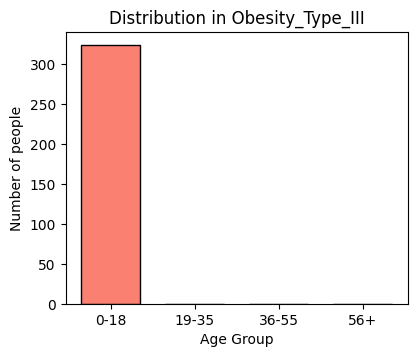

In [54]:
# List of obesity levels
obesity_levels = data['NObeyesdad'].unique()

# Creating a histogram for each obesity level
for i, level in enumerate(obesity_levels):
    plt.figure(figsize=(15, 12))

    plt.subplot(3, 3, i+1)
    subset = data[data['NObeyesdad'] == level]
    plt.hist(subset['Age Group'].dropna(), bins=range(5), align='left', rwidth=0.7, color='salmon', edgecolor='black')

    plt.title(f'Distribution in {level}')
    plt.xlabel('Age Group')
    plt.ylabel('Number of people')
    plt.xticks(range(4), labels)
    plt.show()